In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import preprocessing
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Data Cleansing

### customer_df

In [3]:
customer_df = pd.read_csv('/content/Customer - Case Study.csv',sep=';')

In [4]:
customer_df.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [5]:
customer_df['Marital Status'].fillna('Single', inplace=True)

In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  447 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [7]:
customer_df = pd.get_dummies(customer_df, columns=["Marital Status"])

In [8]:
customer_df.head()

,CustomerID,Age,Gender,Income,Marital Status_Married,Marital Status_Single
0,1,55,1,"5,12",1,0
1,2,60,1,"6,23",1,0
2,3,32,1,"9,17",1,0
3,4,31,1,"4,87",1,0
4,5,58,1,"3,57",1,0


In [9]:
customer_df.drop('Marital Status_Single', axis=1, inplace=True)

In [10]:
customer_df.head()

,CustomerID,Age,Gender,Income,Marital Status_Married
0,1,55,1,"5,12",1
1,2,60,1,"6,23",1
2,3,32,1,"9,17",1
3,4,31,1,"4,87",1
4,5,58,1,"3,57",1


In [11]:
customer_df['Income'] = customer_df['Income'].str.replace(',', '.').astype(float)
customer_df.head()

,CustomerID,Age,Gender,Income,Marital Status_Married
0,1,55,1,5.12,1
1,2,60,1,6.23,1
2,3,32,1,9.17,1
3,4,31,1,4.87,1
4,5,58,1,3.57,1


### product_df

In [12]:
product_df = pd.read_csv('/content/Product - Case Study.csv',sep=';')

In [13]:
product_df.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [14]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


### store_df

In [15]:
store_df = pd.read_csv('/content/Store - Case Study.csv',sep=';')

In [16]:
store_df.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [17]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [18]:
store_df = pd.get_dummies(store_df, columns=["Type"])

In [19]:
store_df.head()

,StoreID,StoreName,GroupStore,Latitude,Longitude,Type_General Trade,Type_Modern Trade
0,1,Prima Tendean,Prima,"-6,2","106,816666",0,1
1,2,Prima Kelapa Dua,Prima,"-6,914864","107,608238",0,1
2,3,Prima Kota,Prima,"-7,797068","110,370529",0,1
3,4,Gita Ginara,Gita,"-6,966667","110,416664",1,0
4,5,Bonafid,Gita,"-7,250445","112,768845",1,0


In [20]:
store_df.drop('Type_Modern Trade', axis=1, inplace=True)

In [21]:
store_df.head()

,StoreID,StoreName,GroupStore,Latitude,Longitude,Type_General Trade
0,1,Prima Tendean,Prima,"-6,2","106,816666",0
1,2,Prima Kelapa Dua,Prima,"-6,914864","107,608238",0
2,3,Prima Kota,Prima,"-7,797068","110,370529",0
3,4,Gita Ginara,Gita,"-6,966667","110,416664",1
4,5,Bonafid,Gita,"-7,250445","112,768845",1


In [22]:
store_df['Latitude'] = store_df['Latitude'].str.replace(',', '.').astype(float)
store_df['Longitude'] = store_df['Longitude'].str.replace(',', '.').astype(float)

In [23]:
store_df.head()

,StoreID,StoreName,GroupStore,Latitude,Longitude,Type_General Trade
0,1,Prima Tendean,Prima,-6.200000,106.816666,0
1,2,Prima Kelapa Dua,Prima,-6.914864,107.608238,0
2,3,Prima Kota,Prima,-7.797068,110.370529,0
3,4,Gita Ginara,Gita,-6.966667,110.416664,1
4,5,Bonafid,Gita,-7.250445,112.768845,1


In [24]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   StoreID             14 non-null     int64  
 1   StoreName           14 non-null     object 
 2   GroupStore          14 non-null     object 
 3   Latitude            14 non-null     float64
 4   Longitude           14 non-null     float64
 5   Type_General Trade  14 non-null     uint8  
dtypes: float64(2), int64(1), object(2), uint8(1)
memory usage: 702.0+ bytes


### transaction_df

In [25]:
transaction_df = pd.read_csv('/content/Transaction - Case Study.csv',sep=';')

In [26]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [27]:
transaction_df['Date'] = pd.to_datetime(transaction_df['Date'], format='%d/%m/%Y')

In [28]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 313.9+ KB


## Merged Dataframe

In [29]:
merged_df = pd.merge(transaction_df, customer_df, on=('CustomerID'))
merged_df = pd.merge(merged_df, product_df.drop(columns=['Price']), on=('ProductID'))
merged_df = pd.merge(merged_df, store_df, on=('StoreID'))

In [30]:
merged_df

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Income,Marital Status_Married,Product Name,StoreName,GroupStore,Latitude,Longitude,Type_General Trade
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,10.53,1,Crackers,Prestasi Utama,Prestasi,-2.990934,104.756554,1
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,0.18,0,Crackers,Prestasi Utama,Prestasi,-2.990934,104.756554,1
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,4.36,1,Crackers,Prestasi Utama,Prestasi,-2.990934,104.756554,1
3,TR4331,335,2022-01-08,P3,7500,3,22500,12,29,1,4.74,0,Crackers,Prestasi Utama,Prestasi,-2.990934,104.756554,1
4,TR6445,181,2022-01-10,P3,7500,4,30000,12,33,1,9.94,1,Crackers,Prestasi Utama,Prestasi,-2.990934,104.756554,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR69555,221,2022-08-01,P4,12000,3,36000,4,23,1,7.50,0,Potato Chip,Gita Ginara,Gita,-6.966667,110.416664,1
5016,TR21587,425,2022-10-17,P4,12000,1,12000,4,58,1,7.22,1,Potato Chip,Gita Ginara,Gita,-6.966667,110.416664,1
5017,TR51183,409,2022-07-19,P4,12000,1,12000,4,47,0,28.23,1,Potato Chip,Gita Ginara,Gita,-6.966667,110.416664,1
5018,TR14963,374,2022-12-16,P4,12000,5,60000,4,32,0,5.40,0,Potato Chip,Gita Ginara,Gita,-6.966667,110.416664,1


In [31]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   TransactionID           5020 non-null   object        
 1   CustomerID              5020 non-null   int64         
 2   Date                    5020 non-null   datetime64[ns]
 3   ProductID               5020 non-null   object        
 4   Price                   5020 non-null   int64         
 5   Qty                     5020 non-null   int64         
 6   TotalAmount             5020 non-null   int64         
 7   StoreID                 5020 non-null   int64         
 8   Age                     5020 non-null   int64         
 9   Gender                  5020 non-null   int64         
 10  Income                  5020 non-null   float64       
 11  Marital Status_Married  5020 non-null   uint8         
 12  Product Name            5020 non-null   object  

## Time Series

### time series dataset

In [32]:
# Membuat DataFrame baru 'regression_df' dengan metode groupby dan fungsi sum
regression_df = merged_df.groupby('Date')['Qty'].sum().reset_index()

In [33]:
regression_df

,Date,Qty
0,2022-01-01,49
1,2022-01-02,59
2,2022-01-03,63
3,2022-01-04,45
4,2022-01-05,30
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,44


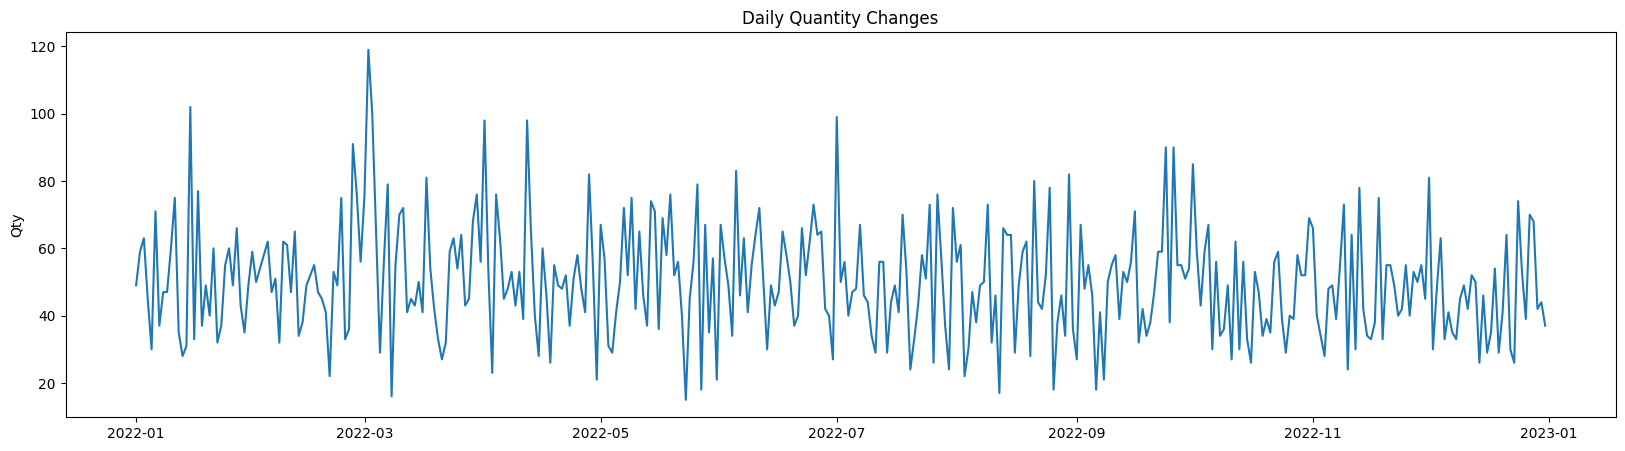

In [34]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=regression_df, x='Date', y='Qty')
plt.xlabel('')
plt.ylabel('Qty')
plt.title('Daily Quantity Changes')  # Judul grafik
plt.show()

In [35]:
# Menghitung jumlah data pada train set dan test set
train_size = int(0.9 * len(regression_df))
test_size = len(regression_df) - train_size

# Memisahkan data menjadi train set dan test set
train_df = regression_df[:train_size]
test_df = regression_df[train_size:]

train_df.shape, test_df.shape

((328, 2), (37, 2))

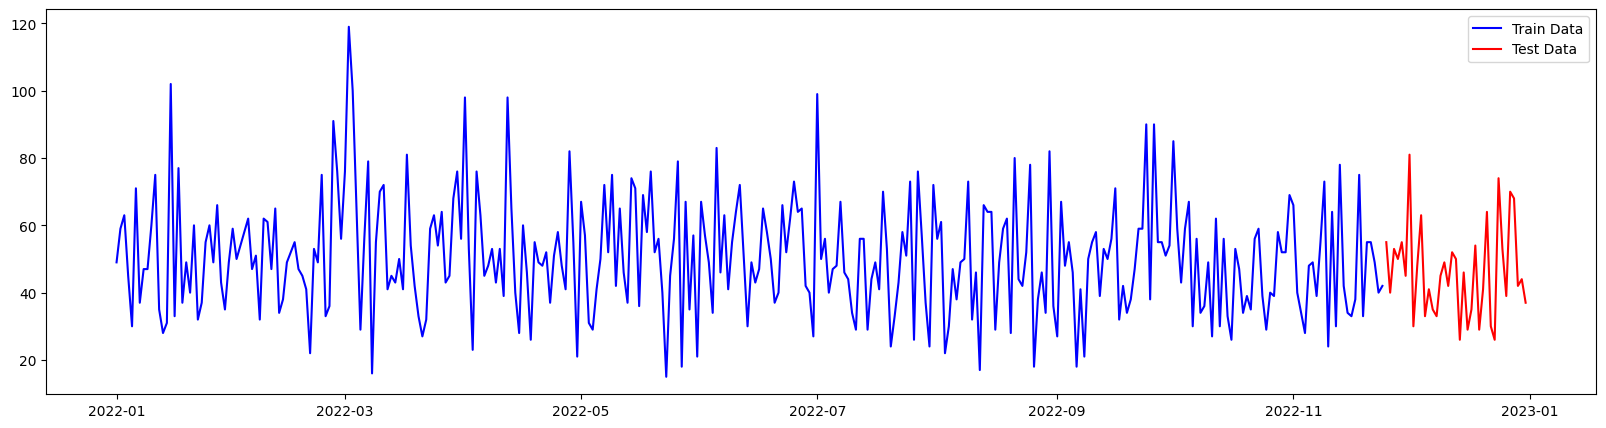

In [36]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=train_df, x='Date', y='Qty', color='blue', label='Train Data')
sns.lineplot(data=test_df, x='Date', y='Qty', color='red', label='Test Data')
plt.xlabel('')
plt.ylabel('')
plt.show()

### time series model

In [37]:
# Mengatur kolom 'Date' sebagai index untuk DataFrame 'regression_df'
regression_df.set_index('Date', inplace=True)

mencari nilai p,d,q untuk model arima
https://analyticsindiamag.com/quick-way-to-find-p-d-and-q-values-for-arima/

In [38]:
# Augmented Dickey-Fuller test
# cek data stasionary atau nonstationary

result = adfuller(regression_df['Qty'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -19.448086
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


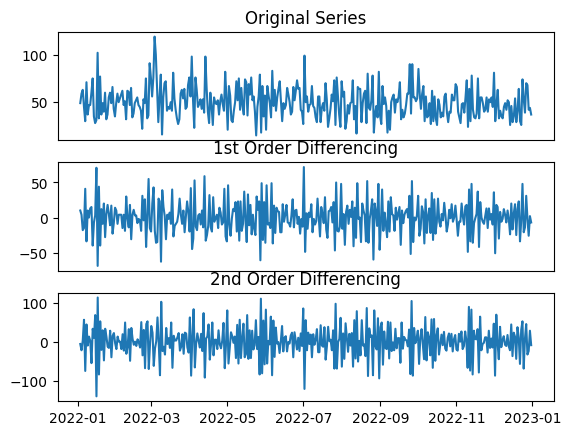

In [40]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(regression_df.Qty); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(regression_df.Qty.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(regression_df.Qty.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

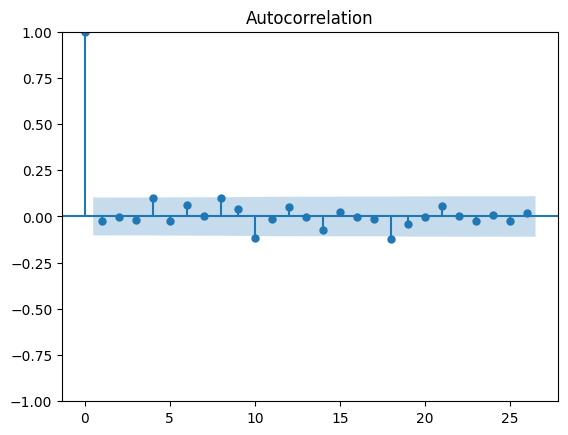

In [39]:
# nilai q
plot_acf(regression_df.Qty)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

MAE: 10.57
RMSE: 13.53


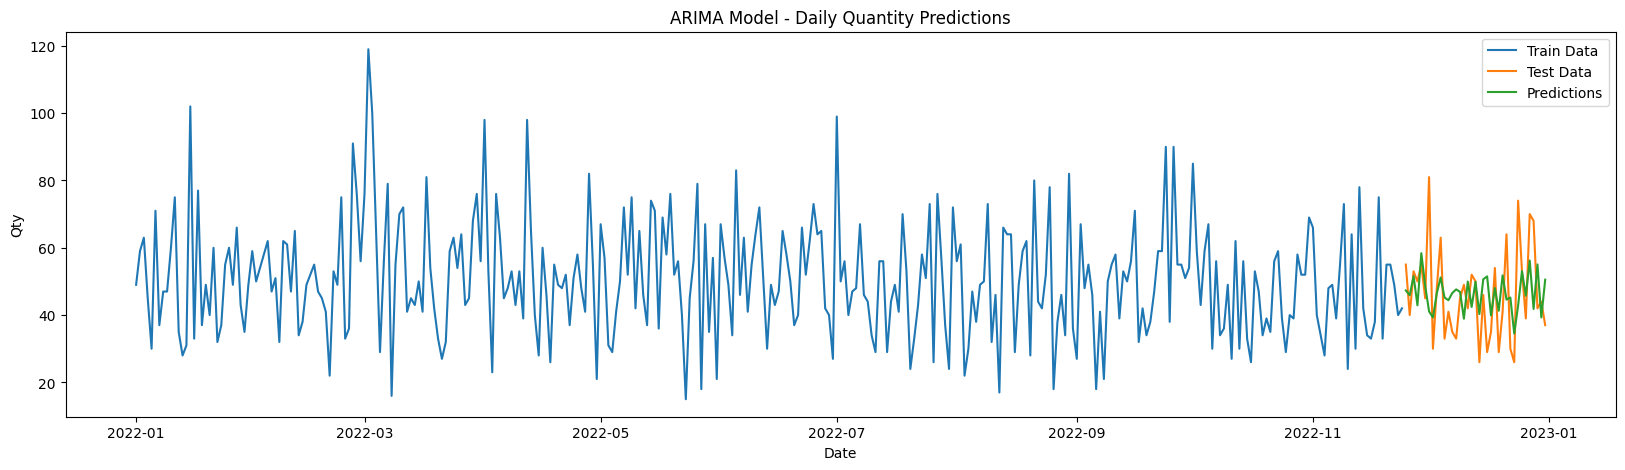

In [ ]:
warnings.filterwarnings("ignore")
# Memisahkan data menjadi train set dan test set
train_size = int(0.9 * len(regression_df))
train_data = regression_df.iloc[:train_size]
test_data = regression_df.iloc[train_size:]

# Melakukan model ARIMA
order = (59, 2, 1)  # Parameter p, d, q untuk ARIMA
model = sm.tsa.ARIMA(train_data, order=order)
results = model.fit()

# Melakukan prediksi pada test set
predictions = results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

# Menghitung MAE dan RMSE
mae = mean_absolute_error(test_data['Qty'], predictions)
rmse = np.sqrt(mean_squared_error(test_data['Qty'], predictions))

# Menampilkan nilai MAE dan RMSE
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Menampilkan grafik hasil prediksi
plt.figure(figsize=(20, 5))
plt.plot(train_data.index, train_data['Qty'], label='Train Data')
plt.plot(test_data.index, test_data['Qty'], label='Test Data')
plt.plot(test_data.index, predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Qty')
plt.title('ARIMA Model - Daily Quantity Predictions')
plt.legend()
plt.show()

## Clustering

### clustering datasets

In [41]:
# Melakukan groupby berdasarkan kolom 'CustomerID' pada DataFrame 'merged_df' dan melakukan aggregasi
grouped_df = merged_df.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

grouped_df

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [42]:
cluster_df = grouped_df.drop(columns=['CustomerID'])

In [43]:
cluster_df_norm = preprocessing.normalize(cluster_df)

In [44]:
no_of_clusters = range(2,10)
inertia =[]

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=42)
    kmeans = kmeans.fit(cluster_df_norm)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f , "Cluster is : " , u)

The inertia for : 2 Cluster is :  7.509073587985661e-08
The inertia for : 3 Cluster is :  4.903336926427653e-08
The inertia for : 4 Cluster is :  3.516447484072391e-08
The inertia for : 5 Cluster is :  2.5404192107007352e-08
The inertia for : 6 Cluster is :  2.0974927087974626e-08
The inertia for : 7 Cluster is :  1.819065039482158e-08
The inertia for : 8 Cluster is :  1.5760470671776346e-08
The inertia for : 9 Cluster is :  1.388208403637613e-08


Text(0.5, 1.0, 'Inertia Plot per k')

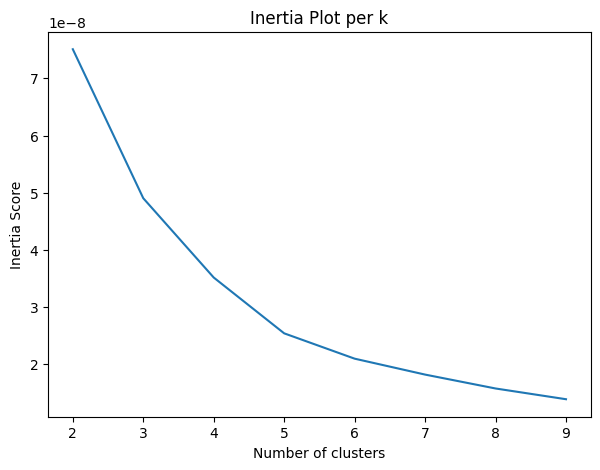

In [48]:
# CREATING SCREE PLOT TO VISUALIZE INERTIA - ELBOW METHOD
fig, (ax1) = plt.subplots(1, figsize =(7,5))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Score")
plt.title("Inertia Plot per k")

In [ ]:
# RE-RUNNNG K-MEANS ON 5 CLUSTERS
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans = kmeans.fit(cluster_df_norm)

kmeans.labels_

# PREDICTIONS FOR NEW DATA
predictions = kmeans.predict(cluster_df_norm)

# CALCULATING THE COUNTS FOR THE CLUSTER
unique , counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# CREATING THE PLOT
countscldf = pd.DataFrame(counts, columns=["Cluster 0 ", "Cluster 1" , "Cluster 2", "Cluster 3", "Cluster 4"])

# DISPLAY THE PLOT
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,103,130,63,4,147


Explained variance ratio (first two components): [9.40379000e-01 5.96209996e-02 3.79621247e-10]


<Figure size 640x480 with 0 Axes>

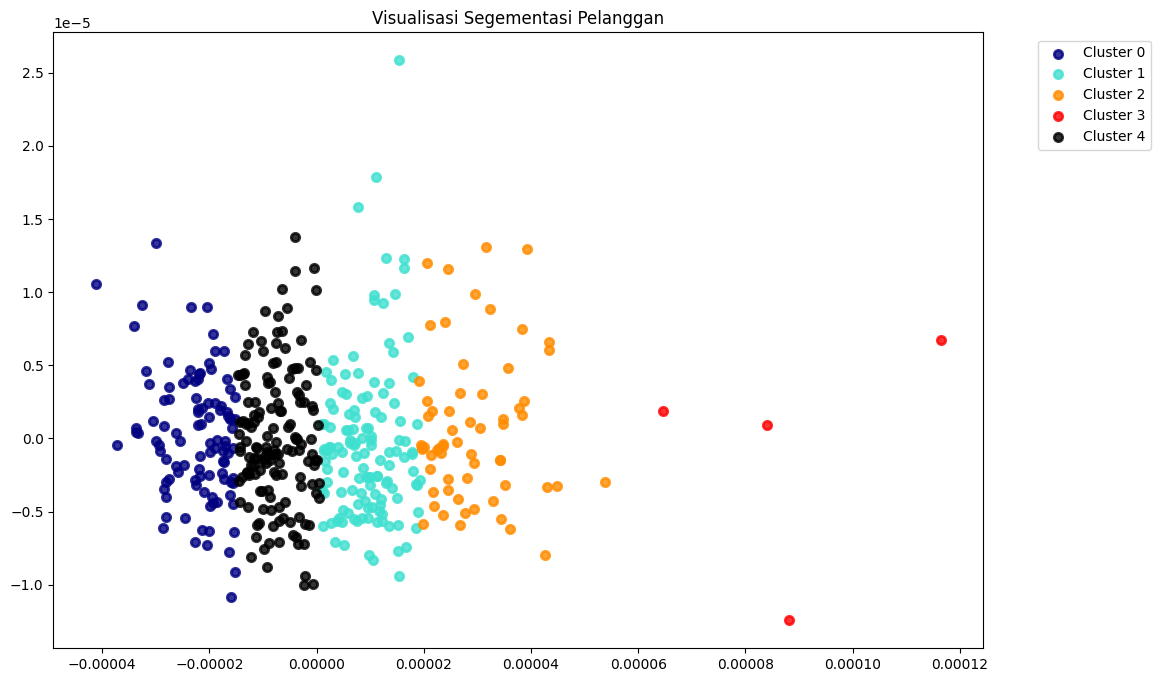

In [ ]:
# RUNNING PCA TO VISUALIZE DATA
from sklearn.decomposition import PCA

X = cluster_df_norm
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=3, random_state = 42)
X_r = pca.fit(X).transform(X)


# PRECENTAGE OF VARIANCE EXPLAINED FOR EACH COMPONENTS
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# PLOTTING DATA POINTS
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3,4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)
plt.title('Visualisasi Segementasi Pelanggan')
plt.show()

In [ ]:
grouped_df['cluster_label'] = predictions

In [ ]:
grouped_df.groupby('cluster_label').agg({
    'CustomerID' : 'count',
    'TransactionID': 'mean',
    'Qty': 'mean',
    'TotalAmount': 'mean'
})

,CustomerID,TransactionID,Qty,TotalAmount
cluster_label,,,,
0,103,11.388350,39.174757,417048.543689
1,130,11.092308,41.876923,336334.615385
2,63,10.634921,40.238095,281184.126984
3,4,7.250000,29.500000,150100.000000
4,147,11.605442,41.931973,388085.034014


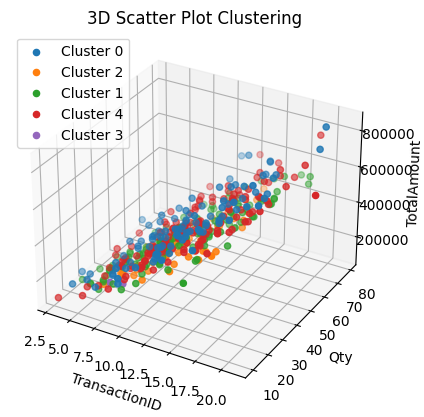

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Misalkan Anda sudah melakukan clustering dan memiliki DataFrame 'grouped_df'
# Jika belum memiliki 'grouped_df', Anda bisa menggantinya dengan DataFrame yang sesuai dengan data Anda

# Membuat 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Memisahkan data berdasarkan klaster
for cluster_label in grouped_df['cluster_label'].unique():
    cluster_data = grouped_df[grouped_df['cluster_label'] == cluster_label]
    ax.scatter(cluster_data['TransactionID'], cluster_data['Qty'], cluster_data['TotalAmount'], label=f'Cluster {cluster_label}')

# Menambahkan keterangan pada sumbu dan judul
ax.set_xlabel('TransactionID')
ax.set_ylabel('Qty')
ax.set_zlabel('TotalAmount')
plt.title('3D Scatter Plot Clustering')

# Menampilkan legend
ax.legend()

# Menampilkan 3D scatter plot
plt.show()


In [ ]:
import plotly.graph_objects as go

# Misalkan Anda sudah melakukan clustering dan memiliki DataFrame 'grouped_df'
# Jika belum memiliki 'grouped_df', Anda bisa menggantinya dengan DataFrame yang sesuai dengan data Anda

# Membuat 3D scatter plot interaktif
fig = go.Figure()

# Memisahkan data berdasarkan klaster
for cluster_label in grouped_df['cluster_label'].unique():
    cluster_data = grouped_df[grouped_df['cluster_label'] == cluster_label]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['TransactionID'],
        y=cluster_data['Qty'],
        z=cluster_data['TotalAmount'],
        mode='markers',
        name=f'Cluster {cluster_label}'
    ))

# Menambahkan keterangan pada sumbu dan judul
fig.update_layout(scene=dict(
        xaxis_title='TransactionID',
        yaxis_title='Qty',
        zaxis_title='TotalAmount'
    ),
    title='3D Scatter Plot Clustering'
)

# Menampilkan 3D scatter plot interaktif
fig.show()
